In [ ]:
import tensorflow as tf

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
from keras.models import Sequential, load_model
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.image import ImageDataGenerator

In [10]:
input_shape=(150,150,3)
img_width, img_height = 150, 150

Adding Layers and intializing CNN

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#flatten layer
model.add(Flatten()) 
# Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Dense(3, activation='softmax'))


Fitting the CNN to the images and Data Augmentation


In [13]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Amazon_webscraping/Train',target_size=(150,150),batch_size=32,class_mode='categorical')

Found 270 images belonging to 3 classes.


In [18]:
test_set = train_datagen.flow_from_directory('/content/drive/My Drive/Amazon_webscraping/Test',target_size=(150,150),batch_size=32,class_mode='categorical')

Found 60 images belonging to 3 classes.


intiating optimizer and configure parameters

In [19]:

from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Compile the model

In [20]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)       

Training the Model

In [22]:
nb_train_samples=1842
nb_validation_samples=82
batch_size=32
epochs=10

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("Model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')


history=model.fit_generator(
   training_set,
    steps_per_epoch=nb_train_samples//batch_size,
    epochs=epochs,
    validation_data=test_set,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[checkpoint,early])

Epoch 1/10
57/57 [==============================] - 154s 3s/step - loss: 1.0957 - accuracy: 0.5064 - val_loss: 0.9012 - val_accuracy: 0.5833

Epoch 00001: val_accuracy improved from -inf to 0.58333, saving model to Model.h5
Epoch 2/10
57/57 [==============================] - 55s 957ms/step - loss: 0.7739 - accuracy: 0.6431 - val_loss: 0.6065 - val_accuracy: 0.6667

Epoch 00002: val_accuracy improved from 0.58333 to 0.66667, saving model to Model.h5
Epoch 3/10
57/57 [==============================] - 56s 983ms/step - loss: 0.6374 - accuracy: 0.7372 - val_loss: 0.5628 - val_accuracy: 0.8167

Epoch 00003: val_accuracy improved from 0.66667 to 0.81667, saving model to Model.h5
Epoch 4/10
57/57 [==============================] - 56s 974ms/step - loss: 0.5760 - accuracy: 0.7803 - val_loss: 0.4400 - val_accuracy: 0.8333

Epoch 00004: val_accuracy improved from 0.81667 to 0.83333, saving model to Model.h5
Epoch 5/10
57/57 [==============================] - 55s 971ms/step - loss: 0.5539 - accur

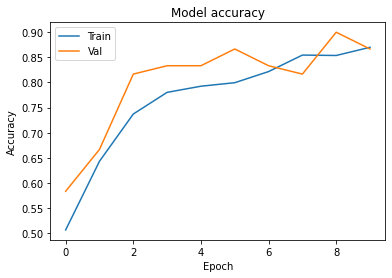

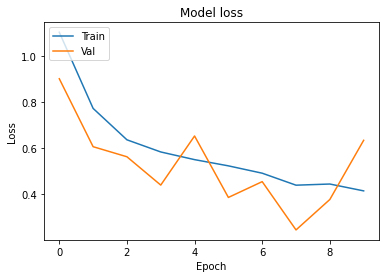

In [25]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()